# Homework 3: Boston Housing Price Dataset
**Boston Housing Price Dataset includes 13 features that affects to house prices.**
- 보스턴 주택 가격에 영향을 미치는 13가지 요인이 수치로 담겨있는 데이터셋이다.
- 요인마다 단위가 다르기 때문에 스케일링을 통해 맞춰주어야 신경망 학습이 가능하다.
- 13가지 요인을 전부 사용해서 예측하지 않고, 중요하다고 생각하는 요인만 추출해서 예측에 사용해본다.
- 데이터의 개수가 적을 때, K-Fold Validation, 교차 검증을 이용한다.

### 1. Load the Dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 
from keras.datasets import boston_housing

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
print('number of train data : {}'.format(len(train_data)))
print('number of test data : {}'.format(len(test_data)))

# train data 와 test data 의 수를 각각 출력한다.
# 데이터의 개수가 딥러닝용으로는 상당히 적은 편이다.

number of train data : 404
number of test data : 102


In [4]:
order = np.argsort(np.random.random(train_labels.shape)) 
train_data = train_data[order] 
train_labels = train_labels[order]

**각 13가지 feature 들은 서로 다른 요소이므로 다른 수치를 나타낸다.**
- CRIM - 도시별 1인당 범죄율
- ZN - 25,000평방피트 이상의 부지로 구획된 주거용 토지의 비율
- INDUS - 도시당 비소매업 에이커 비율
- CHAS - Charles River 더미 변수 (트랙 경계가 강인 경우 1, 그렇지 않은 경우 0)
- NOX - 산화질소 농도 (1000만분의 1)
- RM - 주택당 평균 방 수
- AGE - 1940년 이전에 지어진 소유주가 차지하는 비율
- DIS - 보스턴 고용 센터 5곳까지의 가중 거리
- RAD - 방사형 고속도로에 대한 접근성 지수
- TAX - 10,000 달러 당 전체 가치 재산세율
- PTRATIO - 도시별 학생-교사 비율
- B - 도시별 흑인 비율
- LSTAT - 인구가 적은 상태
- MEDV - 1000 달러의 소유자가 거주하는 주택의 중간 가치

In [5]:
# train data 의 열을 요인의 이름으로 바꾼다.
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 

df1 = pd.DataFrame(train_data, columns=column_names) 
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90
1,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24
2,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02
3,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
4,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98


In [6]:
# test data 의 열을 요인의 이름으로 바꾼다.
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 

df2 = pd.DataFrame(test_data, columns=column_names) 
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05
1,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
2,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
3,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
4,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44


In [7]:
# train data 의 레이블(주택 가격)을 MEDV 열로 바꾼다
prices = ['MEDV']
df3 = pd.DataFrame(train_labels, columns=prices)
df3.head()

,MEDV
0,24.4
1,13.3
2,8.4
3,36.4
4,22.9


In [8]:
# test data 의 레이블(주택 가격)을 MEDV 열로 바꾼다
df4 = pd.DataFrame(test_labels, columns=prices)
df4.head()

,MEDV
0,7.2
1,18.8
2,19.0
3,27.0
4,22.2


### 2. EDA (Exploratory Data Analysis)¶

#### Boxplot

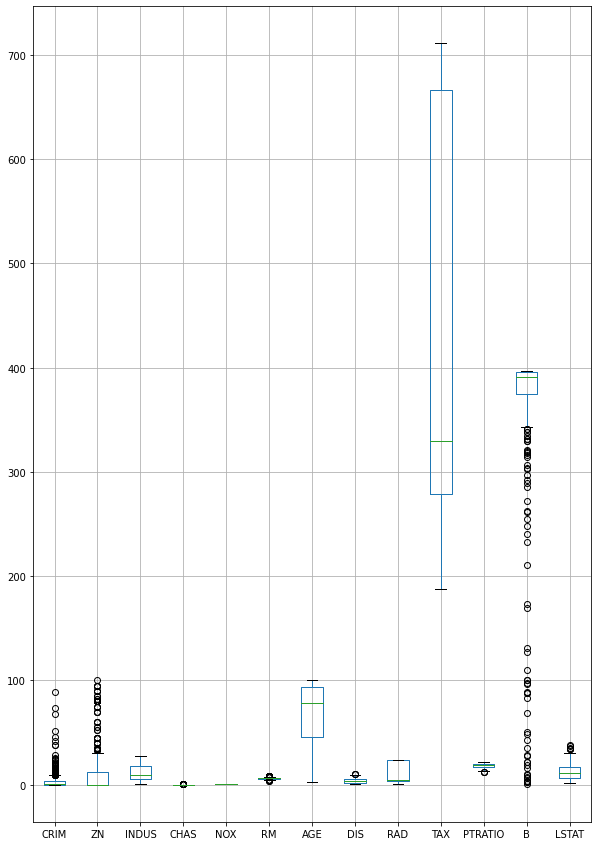

In [9]:
# boxplot 을 통해 13가지 요인들의 분포를 살펴본다.
df1.boxplot(figsize=(10,15))

- boxplot 을 그린 결과, 특징적으로 TAX(10,000 달러 당 전체 가치 재산세율) 요인이 분포가 굉장히 넓은데도 불구하고 평균은 낮은 모습을 볼 수 있었다.
- B(도시별 흑인 비율) 요인의 경우, boxplot 에서 아래쪽으로 벗어난 이상치가 많이 발견되었다.

#### Scatter plot

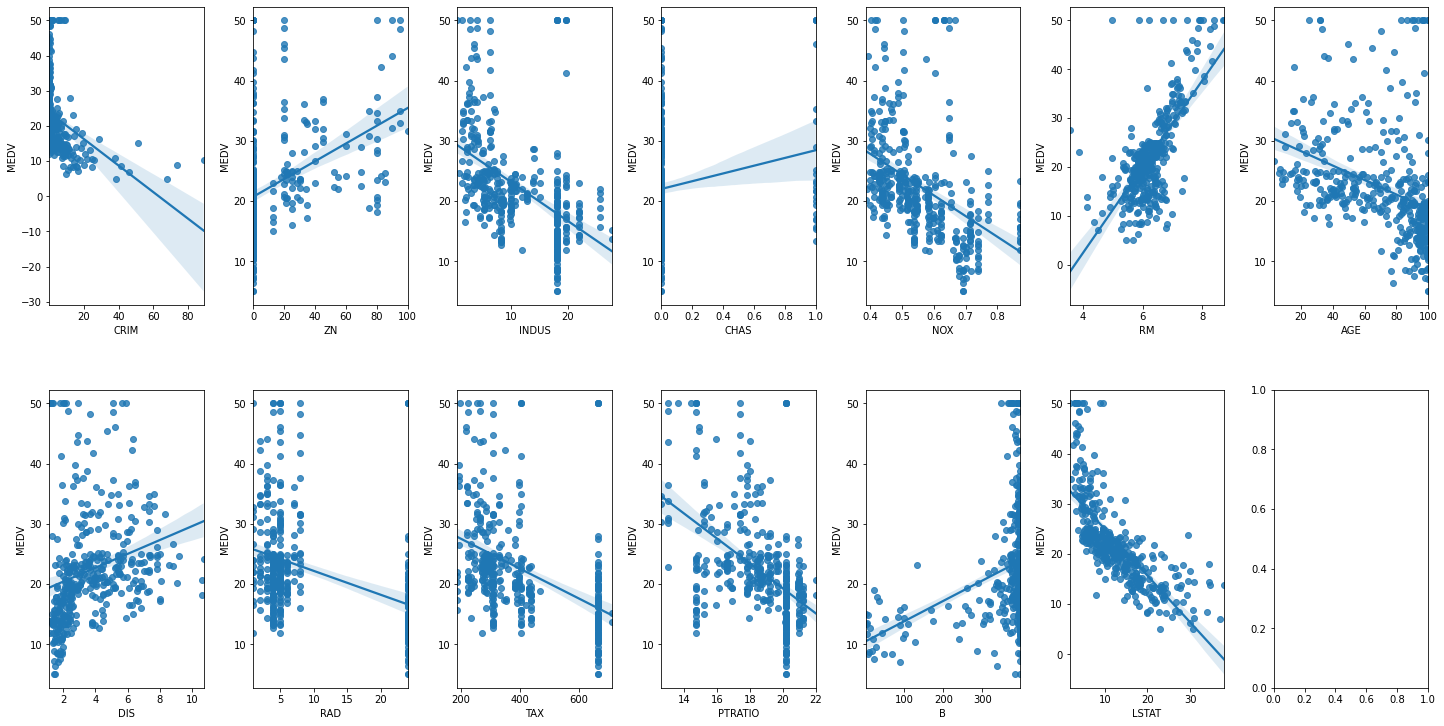

In [10]:
column_sels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 
x = df1.loc[:,column_sels]
y = df3['MEDV']
x = pd.DataFrame(data= x, columns=column_sels)
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

산점도를 기준으로 실선의 추세에 가까운 요인들만 뽑아 신경망 학습에 사용할 예정이다.

**선정한 요인은 CRIM(범죄율), RM(주택 당 평균 방 수), DIS(보스턴 고용 센터 5곳까지의 가중 거리), LSTAT(인구가 적은 상태) 이다.**

### 3. Pre-processing

데이터프레임 내 feature 수치의 단위는 feature 마다 모두 다르다. 따라서 스케일링을 통해 단위를 맞춰주어야 신경망 학습에 도움이 된다.

In [11]:
mean = train_data.mean(axis=0) 
std = train_data.std(axis=0) 
train_data = (train_data - mean) / std 

mean = test_data.mean(axis=0) 
std = test_data.std(axis=0) 
test_data = (test_data - mean) / std

In [12]:
df1 = pd.DataFrame(train_data, columns=column_names) 
df1 # train data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.390584,0.443158,-0.770914,-0.256833,-1.078602,0.310221,-2.007114,1.803239,-0.280929,-0.456756,0.283943,0.441481,-0.944139
1,0.658597,-0.483615,1.028326,-0.256833,0.970091,0.743281,1.067487,-1.174863,1.675886,1.565287,0.784476,0.448077,1.173019
2,1.076246,-0.483615,1.028326,-0.256833,1.559090,-0.468441,0.676891,-0.946723,1.675886,1.565287,0.784476,-3.040953,2.936858
3,-0.396398,1.412057,-1.126646,-0.256833,-1.027385,1.284959,-1.530515,1.351052,-0.511142,-0.047533,-1.490674,0.379882,-1.362326
4,-0.399056,1.201427,-1.448569,-0.256833,-1.095675,0.314453,-0.881910,2.491408,-0.971569,-0.426666,0.556961,0.448077,-0.933098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.392693,-0.483615,-1.207494,-0.256833,-0.959095,2.541820,0.250460,-0.120861,-0.856463,-0.781728,-0.216590,0.448077,-1.177385
400,0.145738,-0.483615,1.028326,-0.256833,1.328612,0.042203,0.816645,-0.676663,1.675886,1.565287,0.784476,0.322432,0.625098
401,-0.400880,-0.483615,0.121356,-0.256833,0.133541,-0.207476,0.275544,-0.716462,-0.971569,-0.799782,1.148500,0.448077,-0.505250
402,-0.400343,0.990797,-0.741515,-0.256833,-1.019702,-0.791472,-1.455262,1.430403,-0.971569,-0.613224,-0.717123,0.417437,-0.042898


In [13]:
df2 = pd.DataFrame(test_data, columns=column_names) 
df2 # test_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,2.804030,-0.507849,0.969609,-0.32969,1.231746,0.119341,1.147398,-0.919353,1.606093,1.407782,0.905130,-4.278295,2.513248
1,-0.555306,-0.507849,-0.178017,-0.32969,0.025980,-0.659396,0.901658,-0.700333,-0.455996,0.082144,-0.284858,0.390945,0.586043
2,-0.568084,-0.507849,-0.861769,-0.32969,-0.266327,-0.551778,-0.742378,0.337890,-0.570556,-1.096201,0.905130,0.415707,-0.385064
3,-0.340188,-0.507849,1.179558,3.03315,0.555786,-0.155683,0.891274,-0.934680,-0.570556,-0.082144,-1.821927,-0.320553,-1.021462
4,-0.564990,-0.507849,-0.961070,-0.32969,-0.869210,-0.348499,-0.347809,-0.111635,-0.799677,-0.965903,0.062222,0.393484,-0.580186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.071436,-0.507849,0.969609,3.03315,1.587995,3.625903,0.555545,-0.889795,1.606093,1.407782,0.905130,-0.122075,-1.052982
98,-0.563597,-0.507849,0.222021,-0.32969,-0.978825,-0.121305,-2.106062,0.101136,-0.570556,-0.110470,0.161387,0.390564,-0.829342
99,-0.235392,-0.507849,1.179558,3.03315,0.555786,2.164088,1.085098,-0.832370,-0.570556,-0.082144,-1.821927,0.323135,-1.558798
100,-0.511391,-0.507849,-0.718493,3.03315,-0.339404,0.892100,0.749368,-0.485704,-0.226875,-0.625996,-0.483190,0.349674,-0.389567


신경망 학습에 사용할 요인만 담긴 데이터프레임을 새로 만들어준다.

In [14]:
df1 = df1.loc[:, ['CRIM', 'RM', 'DIS', 'LSTAT']]
df1

,CRIM,RM,DIS,LSTAT
0,-0.390584,0.310221,1.803239,-0.944139
1,0.658597,0.743281,-1.174863,1.173019
2,1.076246,-0.468441,-0.946723,2.936858
3,-0.396398,1.284959,1.351052,-1.362326
4,-0.399056,0.314453,2.491408,-0.933098
...,...,...,...,...
399,-0.392693,2.541820,-0.120861,-1.177385
400,0.145738,0.042203,-0.676663,0.625098
401,-0.400880,-0.207476,-0.716462,-0.505250
402,-0.400343,-0.791472,1.430403,-0.042898


In [15]:
df2 = df2.loc[:, ['CRIM', 'RM', 'DIS', 'LSTAT']]
df2

,CRIM,RM,DIS,LSTAT
0,2.804030,0.119341,-0.919353,2.513248
1,-0.555306,-0.659396,-0.700333,0.586043
2,-0.568084,-0.551778,0.337890,-0.385064
3,-0.340188,-0.155683,-0.934680,-1.021462
4,-0.564990,-0.348499,-0.111635,-0.580186
...,...,...,...,...
97,0.071436,3.625903,-0.889795,-1.052982
98,-0.563597,-0.121305,0.101136,-0.829342
99,-0.235392,2.164088,-0.832370,-1.558798
100,-0.511391,0.892100,-0.485704,-0.389567


In [16]:
# 변형한 데이터 프레임을 넘파이 배열로 다시 바꿔준다.
train_data = df1.to_numpy()
test_data = df2.to_numpy()
train_labels = df3.to_numpy()
test_labels = df4.to_numpy()

## Experiments

In [17]:
from keras import models
from keras import layers
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras import optimizers 

### (1) Basic Neural Network Model
- activation function: relu
- optimizer: Adam
- loss function: mean_squared_error
- batch size: 64
- epoch: 20

In [18]:
model = Sequential()
model.add(layers.Dense(26, activation='relu', input_shape=(4,)))
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dense(1))

In [19]:
model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['accuracy'])

In [20]:
history = model.fit(train_data,
                    train_labels,
                    epochs = 20,
                    batch_size = 10,
                    validation_data=(test_data, test_labels))

Epoch 1/20
41/41 [==============================] - 1s 15ms/step - loss: 518.8306 - accuracy: 0.0000e+00 - val_loss: 513.7328 - val_accuracy: 0.0000e+00
Epoch 2/20
41/41 [==============================] - 0s 2ms/step - loss: 476.1888 - accuracy: 0.0000e+00 - val_loss: 387.0836 - val_accuracy: 0.0000e+00
Epoch 3/20
41/41 [==============================] - 0s 1ms/step - loss: 337.6762 - accuracy: 0.0000e+00 - val_loss: 216.8034 - val_accuracy: 0.0000e+00
Epoch 4/20
41/41 [==============================] - 0s 2ms/step - loss: 169.7333 - accuracy: 0.0000e+00 - val_loss: 86.4301 - val_accuracy: 0.0000e+00
Epoch 5/20
41/41 [==============================] - 0s 1ms/step - loss: 75.4040 - accuracy: 0.0000e+00 - val_loss: 52.8665 - val_accuracy: 0.0000e+00
Epoch 6/20
41/41 [==============================] - 0s 1ms/step - loss: 45.4916 - accuracy: 0.0000e+00 - val_loss: 42.4450 - val_accuracy: 0.0000e+00
Epoch 7/20
41/41 [==============================] - 0s 1ms/step - loss: 34.0232 - accuracy: 

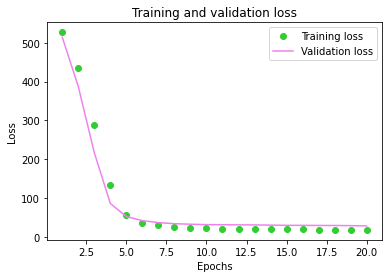

In [21]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### (2) Basic model + loss function = mean_absolute_error
회귀 문제에 자주 사용되는 함수는 mse, mae 가 있다. 이번에는 mae 를 사용했다.
- activation function: relu
- optimizer: Adam
- **loss function: mean_absolute_error**
- batch size: 10
- epoch: 20

In [22]:
model = models.Sequential()
model.add(layers.Dense(26,activation='relu', input_shape=(4,)))
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dense(1))

In [23]:
model.compile(optimizer='adam',
             loss='mean_absolute_error',
             metrics=['accuracy'])

In [24]:
history = model.fit(train_data,
                    train_labels,
                    epochs = 20,
                    batch_size = 10,
                    validation_data=(test_data, test_labels))

Epoch 1/20
41/41 [==============================] - 0s 4ms/step - loss: 21.8901 - accuracy: 0.0000e+00 - val_loss: 21.5697 - val_accuracy: 0.0000e+00
Epoch 2/20
41/41 [==============================] - 0s 2ms/step - loss: 19.5565 - accuracy: 0.0000e+00 - val_loss: 18.7316 - val_accuracy: 0.0000e+00
Epoch 3/20
41/41 [==============================] - 0s 1ms/step - loss: 16.7931 - accuracy: 0.0000e+00 - val_loss: 13.2957 - val_accuracy: 0.0000e+00
Epoch 4/20
41/41 [==============================] - 0s 1ms/step - loss: 10.9256 - accuracy: 0.0000e+00 - val_loss: 7.6443 - val_accuracy: 0.0000e+00
Epoch 5/20
41/41 [==============================] - 0s 1ms/step - loss: 5.4519 - accuracy: 0.0000e+00 - val_loss: 5.5034 - val_accuracy: 0.0000e+00
Epoch 6/20
41/41 [==============================] - 0s 1ms/step - loss: 4.0070 - accuracy: 0.0000e+00 - val_loss: 4.6313 - val_accuracy: 0.0000e+00
Epoch 7/20
41/41 [==============================] - 0s 1ms/step - loss: 3.4999 - accuracy: 0.0000e+00 - v

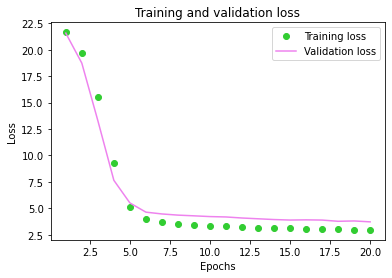

In [25]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: mse 대신 mae 를 사용하자 validation loss 가 확실히 많이 줄었다. 그럼에도 회귀모델은 정확도를 평가할 수 없으므로 오차(실제값 과 예측값의 차이)를 이용해서 평가해야한다. 따라서 교차검증을 통해 오차 점수를 구한다.**

### (3) Basic model + K-Fold Validation
K-Fold Validation 은 데이터의 개수가 적은 경우, 어떤 부분이 학습 데이터로 사용되냐에 따라 모델의 성능이 달라질 수 있는 위험이 있을 때 사용한다. 먼저 데이터를 K개의 분할로 나누고 각각 K개의 모델을 만들어 K-1 개의 분할에서 훈련하고 나머지 분할된 데이터에서 평가를 한다.
- **K-Fold Validation 사용**
- activation function: relu
- optimizer: Adam
- loss function: mean_absolute_error
- batch size: 1
- epoch: 150

In [26]:
model.compile(optimizer='adam',
             loss='mean_absolute_error',
             metrics=['accuracy'])

In [27]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 150
all_scores = []
all_history = []
for i in range(k):
    print('폴드 번호 #{}'.format(i))
    fold_start_index = i * num_val_samples
    fold_end_index = (i + 1) * num_val_samples
    
    val_data = train_data[fold_start_index : fold_end_index]
    val_labels = train_labels[fold_start_index : fold_end_index]
    
    partial_train_data = np.concatenate(
        [train_data[:fold_start_index], train_data[fold_end_index:]], 
        axis=0
    )
    
    partial_train_labels = np.concatenate(
        [train_labels[:fold_start_index], train_labels[fold_end_index:]],
        axis=0
    )
    
    
    model = models.Sequential()
    model.add(layers.Dense(26,activation='relu', input_shape=(4,)))
    model.add(layers.Dense(26, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='adam',
             loss='mean_absolute_error',
             metrics=['accuracy'])
    
    history = model.fit(
        partial_train_data,
        partial_train_labels,
        epochs=num_epochs, 
        validation_data=(val_data, val_labels),
        batch_size=1,
        verbose=0
    )
    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
    all_scores.append(val_mse)
    all_history.append(history.history)

폴드 번호 #0
폴드 번호 #1
폴드 번호 #2
폴드 번호 #3


In [28]:
all_scores

[2.271575927734375, 2.6944334506988525, 3.563490867614746, 1.9985575675964355]

In [29]:
# 4가지 폴드에서 비롯된 오차의 평균을 구한다.
np.mean(all_scores)

2.6320144534111023

폴드의 오차 평균을 구한 결과, 실제 가격과 2,600달러 정도 차이가 난다는 사실을 알 수가 있다. 이를 그래프로 표현하면 아래와 같다.

In [30]:
# history 데이터를 epoch 별 데이터로 치환시킨다.
val_mae_lst = map(lambda x: x['val_loss'], all_history)
val_mae_lst = np.array(list(val_mae_lst))
avg_mae = [
    np.mean([x[i] for x in val_mae_lst]) for i in range(num_epochs)
]

In [31]:
import matplotlib.pyplot as plt
def smooth_curve(points, factor=.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [32]:
def show_graph(data):
    smooth_data = smooth_curve(data)
    plt.plot(range(1, len(smooth_data) + 1), smooth_data)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()

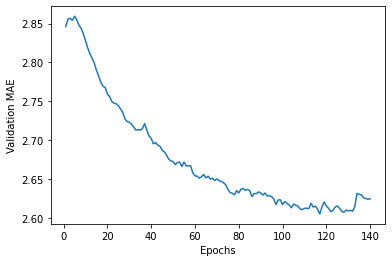

In [33]:
show_graph(avg_mae[10:])

**결과: K-Fold Validation 결과, 그래프 상에서 epoch 이 반복될수록 MAE(평균 절대 오차) 가 점점 줄어드는 모습을 볼 수 있다.**

## Insights

딥러닝용으로 데이터의 개수가 적은 경우, K-Fold Validation 교차 검증을 활용할 수 있다. 또한, 평균 절대 오차는 예측과 레이블의 절대적 거리를 계산할 수 있어 유용하다.